# In class task 1 (ICE-1)

### **Team Members :**
*   Aditya Pujari (11491374)
*   Gagan Sai Ram Anvesh Achanta (11447940)
*   Praveen Kumar somara (11525451)
*   Sai Pranathi Karedla (11533059)
*   Brinda Potluri (11526591)




# Web Scraping News Articles

### Getting Google News 

In [ ]:
!pip install -q GoogleNews
!pip install -q newspaper3k

In [ ]:
import os
ROOT = '/content/drive/MyDrive/College/CSCE 5222 - Feature Engineering/ICA 1'
os.chdir(ROOT)
assert os.getcwd() == ROOT

In [ ]:
from GoogleNews import GoogleNews
from newspaper import Config
import pandas as pd
import nltk
#config will allow us to access the specified url for which we are #not authorized. Sometimes we may get 403 client error while parsing #the link to download the article.
nltk.download('punkt')

user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
config = Config()
config.browser_user_agent = user_agent
googlenews=GoogleNews()

article_topics = ["Autonomous vehicles","Bitcoin","Coronavirus","Space Travel"]



for filename in article_topics:
  # Empty Dataframe
  main = []
  googlenews.search(filename)
  for pgno in range(1,51):
      result = googlenews.page_at(pgno)
      main.extend(result)

  df=pd.DataFrame(main)
  print(df.head())
  df.to_csv("/dataset/"+filename+".csv",encoding='utf-8', index=False)


### Adding Category Feature

In [ ]:
import pandas as pd

autodf = pd.read_csv('/dataset/Autonomous vehicles.csv')
btcdf = pd.read_csv('/dataset/Bitcoin.csv')
coronadf = pd.read_csv('/dataset/Coronavirus.csv')
spacetraveldf = pd.read_csv('/dataset/Space Travel.csv')

autodf['Category'] = "Autonomous vehicles"
btcdf['Category'] = "Bitcoin"
coronadf['Category'] = "Coronavirus"
spacetraveldf['Category'] = "Space Travel"

autodf.to_csv("/dataset/Autonomous vehicles.csv",encoding='utf-8', index=False)
btcdf.to_csv("/dataset/Bitcoin.csv",encoding='utf-8', index=False)
coronadf.to_csv("/dataset/Coronavirus.csv",encoding='utf-8', index=False)
spacetraveldf.to_csv("/dataset/Space Travel.csv",encoding='utf-8', index=False)


### Merging Files

In [ ]:
# importing pandas
import pandas as pd

# merging two csv files
df = pd.concat(
    map(pd.read_csv, ['/dataset/Autonomous vehicles.csv', '/dataset/Coronavirus.csv','/dataset/Space Travel.csv','/dataset/Bitcoin.csv']), ignore_index=True)
print(df.head())
df.to_csv("final_dataset.csv",encoding='utf-8', index=False)

#Text Classification

### Connecting to Drive Disk
For mounting the dataset and meta data generated from previous executions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
ROOT = '/content/drive/MyDrive/College/CSCE 5222 - Feature Engineering/ICA 1'
os.chdir(ROOT)
assert os.getcwd() == ROOT

### Installing necessary Libraries

In [ ]:
!pip install -q altair

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import pickle
import random
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import io
import re
from pprint import pprint

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

## Setting seed and important constants
This solves the issue of randomness in training models

In [ ]:
seed = 42 
np.random.seed(seed)
random.seed(8)

## File Names

In [ ]:
log_files_fn = "log_files"

final_dataset_fn = "log_files/final_dataset.pickle"
X_train_fn = "log_files/X_train.pickle"
X_test_fn = "log_files/X_test.pickle"
y_train_fn = "log_files/y_train.pickle"
y_test_fn = "log_files/y_test.pickle"
df_fn = "log_files/df.pickle"
features_train_fn = "log_files/features_train.pickle"
labels_train_fn = "log_files/labels_train.pickle"
features_test_fn = "log_files/features_test.pickle"
labels_test_fn = "log_files/labels_test.pickle"
tfidf_fn = "log_files/tfidf.pickle"

results_fn = "results"
trained_models_fn = "trained_models"

random_forest_results_fn = "results/random_forest.pickle"
random_forest_model_fn = "trained_models/random_forest.pickle"

svm_results_fn = "results/svm.pickle"
svm_model_fn = "trained_models/svm.pickle"

knn_results_fn = "results/knn.pickle"
knn_model_fn = "trained_models/knn.pickle"

multinomial_naive_bayes_results_fn = "results/multinomial_naive_bayes.pickle"
multinomial_naive_bayes_model_fn = "trained_models/multinomial_naive_bayes.pickle"

multinomial_logistic_regression_results_fn = "results/multinomial_logistic_regression.pickle"
multinomial_logistic_regression_model_fn = "trained_models/multinomial_logistic_regression.pickle"

gradient_boosting_machine_results_fn = "results/gradient_boosting_machine.pickle"
gradient_boosting_machine_model_fn = "trained_models/gradient_boosting_machine.pickle"

## Helper Modules

In [ ]:
def check_directory_exists(filename):
  if os.path.isdir(filename):
    pass
  else:
    os.mkdir(filename)

## Loading dataset

In [ ]:
df = pd.read_csv('final_dataset.csv')

In [ ]:
df.head()

,title,media,date,datetime,desc,link,img,Category
0,Facebook Apologizes For Embarrassing Mistake C...,Forbes,1 hour ago,2021-09-04 20:13:47.921623,"Last week at the Paralympics in Tokyo, Toyota ...",https://www.forbes.com/sites/edwardsegal/2021/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles
1,EVs In 60ish Seconds: This Week's Interesting ...,InsideEVs,3 hours ago,2021-09-04 18:13:47.923740,... on helping electric and autonomous vehicle...,https://insideevs.com/news/530973/electric-car...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles
2,Why Cupertino Could Get Its Act Together With ...,Benzinga,4 hours ago,2021-09-04 17:13:47.925727,"Apple, Inc. (NASDAQ:AAPL) Car rumors resurface...",https://www.benzinga.com/analyst-ratings/analy...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles
3,This Is Why Tesla Is Offering Its Self-Driving...,HotCars,6 hours ago,2021-09-04 15:13:47.927648,Tesla has always been miles ahead of the compe...,https://www.hotcars.com/this-is-why-tesla-is-o...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles
4,Expo 2020 Dubai to drive the future of transport,Khaleej Times,6 hours ago,2021-09-04 15:13:47.929540,The Expo will be shaping and driving future mo...,https://www.khaleejtimes.com/uae/expo-2020-dub...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles


# Exploratory Data Analysis

## Number of articles in each category

In [ ]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of articles in each category",
)

alt.LayerChart(...)

## % of articles in each category

In [ ]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of articles in each category",
)

alt.LayerChart(...)

The classes are approximately balanced. We'll first try to train the models without oversampling/undersampling. If we see some bias in the model, we'll use these techniques.

## Title length by category

Definition of news length field. Although there are special characters in the text (``\r, \n``), it will be useful as an approximation.

In [ ]:
df['Title_length'] = df['title'].str.len()

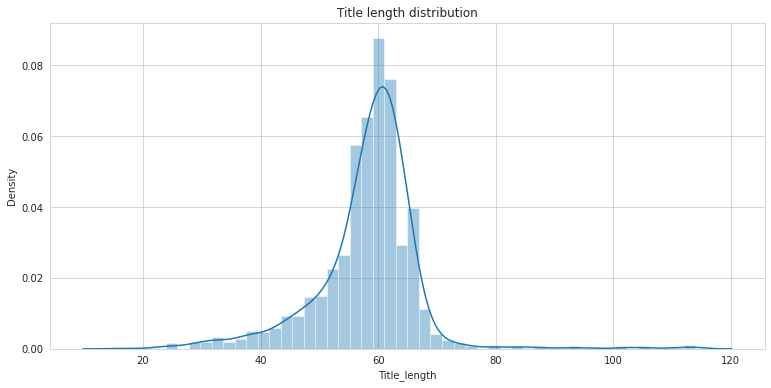

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['Title_length']).set_title('Title length distribution');

In [ ]:
df['Title_length'].describe()

count    1502.000000
mean       58.246338
std         8.997848
min        16.000000
25%        56.000000
50%        60.000000
75%        63.000000
max       114.000000
Name: Title_length, dtype: float64

Let's remove from the 95% percentile onwards to better appreciate the histogram:

In [ ]:
quantile_95 = df['Title_length'].quantile(0.95)
df_95 = df[df['Title_length'] < quantile_95]

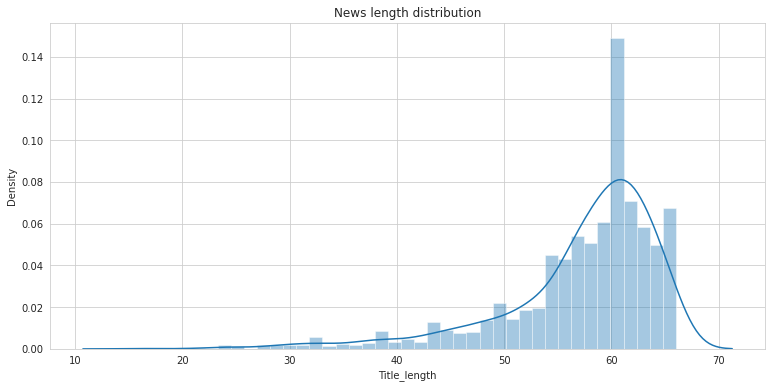

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['Title_length']).set_title('News length distribution');

We can get the number of news articles with more than 10,000 characters:

In [ ]:
df_more10k = df[df['Title_length'] > 100]
len(df_more10k)

9

Let's see one:

In [ ]:
df_more10k['title'].iloc[0]

'NSW Covid lockdown restrictions: update to Sydney, regional NSW and Canberra, ACT coronavirus rules explained'

It's just a large news article.

Let's now plot a boxplot:

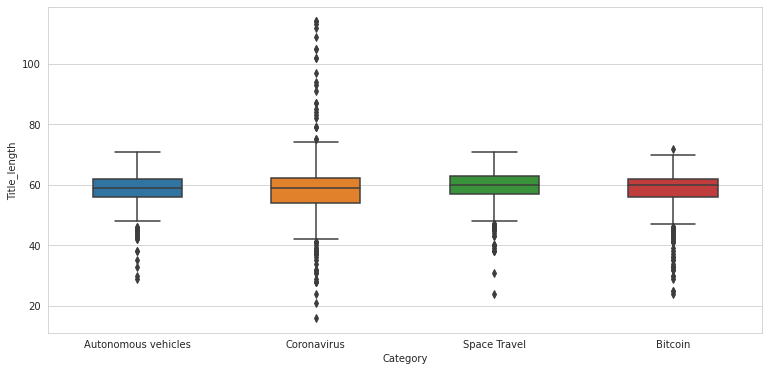

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df, x='Category', y='Title_length', width=.5);

Now, let's remove the larger documents for better comprehension:

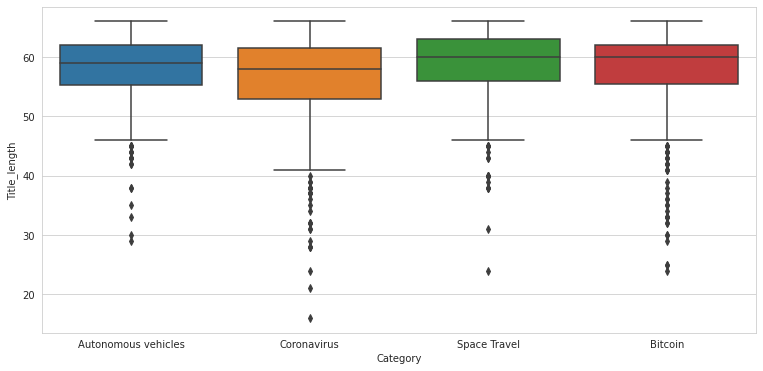

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='Category', y='Title_length');

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.

We'll save the dataset:

In [ ]:
check_directory_exists(log_files_fn)
with open(final_dataset_fn, 'wb') as output:
    pickle.dump(df, output)

# Feature Engineering

The next step is to create features from the raw text so we can train the machine learning models. The steps followed are:

1. **Text Cleaning and Preparation**: cleaning of special characters, downcasing, punctuation signs. possessive pronouns and stop words removal and lemmatization. 
2. **Label coding**: creation of a dictionary to map each category to a code.
3. **Train-test split**: to test the models on unseen data.
4. **Text representation**: use of TF-IDF scores to represent text.

First of all we'll load the dataset:

In [ ]:
check_directory_exists(log_files_fn)
with open(final_dataset_fn, 'rb') as data:
    df = pickle.load(data)

In [ ]:
df.head()

,title,media,date,datetime,desc,link,img,Category,id,Title_length
0,Facebook Apologizes For Embarrassing Mistake C...,Forbes,1 hour ago,2021-09-04 20:13:47.921623,"Last week at the Paralympics in Tokyo, Toyota ...",https://www.forbes.com/sites/edwardsegal/2021/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,57
1,EVs In 60ish Seconds: This Week's Interesting ...,InsideEVs,3 hours ago,2021-09-04 18:13:47.923740,... on helping electric and autonomous vehicle...,https://insideevs.com/news/530973/electric-car...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,57
2,Why Cupertino Could Get Its Act Together With ...,Benzinga,4 hours ago,2021-09-04 17:13:47.925727,"Apple, Inc. (NASDAQ:AAPL) Car rumors resurface...",https://www.benzinga.com/analyst-ratings/analy...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,64
3,This Is Why Tesla Is Offering Its Self-Driving...,HotCars,6 hours ago,2021-09-04 15:13:47.927648,Tesla has always been miles ahead of the compe...,https://www.hotcars.com/this-is-why-tesla-is-o...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,61
4,Expo 2020 Dubai to drive the future of transport,Khaleej Times,6 hours ago,2021-09-04 15:13:47.929540,The Expo will be shaping and driving future mo...,https://www.khaleejtimes.com/uae/expo-2020-dub...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,48


And visualize one sample news content:

In [ ]:
df.loc[1]['title']

"EVs In 60ish Seconds: This Week's Interesting EV News ..."

## 1 . Text cleaning and preparation

### 1.1. Special character cleaning

We can see the following special characters:

* ``\r``
* ``\n``
* ``\`` before possessive pronouns (`government's = government\'s`)
* ``\`` before possessive pronouns 2 (`Yukos'` = `Yukos\'`)
* ``"`` when quoting text

In [ ]:
df['Content_Parsed_1'] = df['title'].str.replace("\r", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("\n", " ")
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("    ", " ")

Regarding 3rd and 4th bullet, although it seems there is a special character, it won't affect us since it is not a *real* character:

In [ ]:
text = "Mr Greenspan\'s"
text

"Mr Greenspan's"

In [ ]:
df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace('"', '')

### 1.2. Upcase/downcase

We'll downcase the texts because we want, for example, `Football` and `football` to be the same word.

In [ ]:
df['Content_Parsed_2'] = df['Content_Parsed_1'].str.lower()

### 1.3. Punctuation signs

Punctuation signs won't have any predicting power, so we'll just get rid of them.

In [ ]:
punctuation_signs = list("?:!.,;")
df['Content_Parsed_3'] = df['Content_Parsed_2']

for punct_sign in punctuation_signs:
    df['Content_Parsed_3'] = df['Content_Parsed_3'].str.replace(punct_sign, '')

By doing this we are messing up with some numbers, but it's no problem since we aren't expecting any predicting power from them.

### 1.4. Possessive pronouns

We'll also remove possessive pronoun terminations:

In [ ]:
df['Content_Parsed_4'] = df['Content_Parsed_3'].str.replace("'s", "")

### 1.5. Stemming and Lemmatization

Since stemming can produce output words that don't exist, we'll only use a lemmatization process at this moment. Lemmatization takes into consideration the morphological analysis of the words and returns words that do exist, so it will be more useful for us.

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

In order to lemmatize, we have to iterate through every word:

In [ ]:
nrows = len(df)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = df.loc[row]['Content_Parsed_4']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [ ]:
df['Content_Parsed_5'] = lemmatized_text_list

Although lemmatization doesn't work perfectly in all cases (as can be seen in the example below), it can be useful.

### 1.6. Stop words

In [ ]:
# Loading the stop words in english
stop_words = list(stopwords.words('english'))

In [ ]:
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

To remove the stop words, we'll handle a regular expression only detecting whole words, as seen in the following example:

In [ ]:
example = "me eating a meal"
word = "me"

# The regular expression is:
regex = r"\b" + word + r"\b"  # we need to build it like that to work properly

re.sub(regex, "StopWord", example)

'StopWord eating a meal'

We can now loop through all the stop words:

In [ ]:
df['Content_Parsed_6'] = df['Content_Parsed_5']

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    df['Content_Parsed_6'] = df['Content_Parsed_6'].str.replace(regex_stopword, '')

We have some dobule/triple spaces between words because of the replacements. However, it's not a problem because we'll tokenize by the spaces later.

As an example, we'll show an original news article and its modifications throughout the process:

In [ ]:
df.loc[5]['title']

'Hyundai reveals Ioniq 5-based robotaxi'

1. Special character cleaning

In [ ]:
df.loc[5]['Content_Parsed_1']

'Hyundai reveals Ioniq 5-based robotaxi'

2. Upcase/downcase

In [ ]:
df.loc[5]['Content_Parsed_2']

'hyundai reveals ioniq 5-based robotaxi'

3. Punctuation signs

In [ ]:
df.loc[5]['Content_Parsed_3']

'hyundai reveals ioniq 5-based robotaxi'

4. Possessive pronouns

In [ ]:
df.loc[5]['Content_Parsed_4']

'hyundai reveals ioniq 5-based robotaxi'

5. Stemming and Lemmatization

In [ ]:
df.loc[5]['Content_Parsed_5']

'hyundai reveal ioniq 5-based robotaxi'

6. Stop words

In [ ]:
df.loc[5]['Content_Parsed_6']

'hyundai reveal ioniq 5-based robotaxi'

Finally, we can delete the intermediate columns:

In [ ]:
df.head(1)

,title,media,date,datetime,desc,link,img,Category,id,Title_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6
0,Facebook Apologizes For Embarrassing Mistake C...,Forbes,1 hour ago,2021-09-04 20:13:47.921623,"Last week at the Paralympics in Tokyo, Toyota ...",https://www.forbes.com/sites/edwardsegal/2021/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,57,Facebook Apologizes For Embarrassing Mistake C...,facebook apologizes for embarrassing mistake c...,facebook apologizes for embarrassing mistake c...,facebook apologizes for embarrassing mistake c...,facebook apologize for embarrass mistake cause...,facebook apologize embarrass mistake cause ai


In [ ]:
list_columns = df[["title", "media", "date", "datetime", "Content_Parsed_6", "Category"]]
list_columns = list_columns.rename(columns={'Content_Parsed_6': 'Content_Parsed'})

In [ ]:
list_columns.head()

,title,media,date,datetime,Content_Parsed,Category
0,Facebook Apologizes For Embarrassing Mistake C...,Forbes,1 hour ago,2021-09-04 20:13:47.921623,facebook apologize embarrass mistake cause ai,Autonomous vehicles
1,EVs In 60ish Seconds: This Week's Interesting ...,InsideEVs,3 hours ago,2021-09-04 18:13:47.923740,evs 60ish second week interest ev news,Autonomous vehicles
2,Why Cupertino Could Get Its Act Together With ...,Benzinga,4 hours ago,2021-09-04 17:13:47.925727,cupertino could get act together 'apple car,Autonomous vehicles
3,This Is Why Tesla Is Offering Its Self-Driving...,HotCars,6 hours ago,2021-09-04 15:13:47.927648,tesla offer self-driving tech rival,Autonomous vehicles
4,Expo 2020 Dubai to drive the future of transport,Khaleej Times,6 hours ago,2021-09-04 15:13:47.929540,expo 2020 dubai drive future transport,Autonomous vehicles


**IMPORTANT:**

We need to remember that our model will gather the latest news articles from different newspapers every time we want. For that reason, we not only need to take into account the peculiarities of the training set articles, but also possible ones that are present in the gathered news articles.


## 2 . Label coding

We'll create a dictionary with the label codification:

In [ ]:
category_codes = {
    'Autonomous vehicles': 0,
    'Coronavirus': 1,
    'Space Travel': 2,
    'Bitcoin': 3,
}

In [ ]:
# Category mapping
df['Category_Code'] = list_columns['Category']
df = df.replace({'Category_Code':category_codes})

In [ ]:
df.head()

,title,media,date,datetime,desc,link,img,Category,id,Title_length,Content_Parsed_1,Content_Parsed_2,Content_Parsed_3,Content_Parsed_4,Content_Parsed_5,Content_Parsed_6,Category_Code
0,Facebook Apologizes For Embarrassing Mistake C...,Forbes,1 hour ago,2021-09-04 20:13:47.921623,"Last week at the Paralympics in Tokyo, Toyota ...",https://www.forbes.com/sites/edwardsegal/2021/...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,57,Facebook Apologizes For Embarrassing Mistake C...,facebook apologizes for embarrassing mistake c...,facebook apologizes for embarrassing mistake c...,facebook apologizes for embarrassing mistake c...,facebook apologize for embarrass mistake cause...,facebook apologize embarrass mistake cause ai,0
1,EVs In 60ish Seconds: This Week's Interesting ...,InsideEVs,3 hours ago,2021-09-04 18:13:47.923740,... on helping electric and autonomous vehicle...,https://insideevs.com/news/530973/electric-car...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,57,EVs In 60ish Seconds: This Week's Interesting ...,evs in 60ish seconds: this week's interesting ...,evs in 60ish seconds this week's interesting e...,evs in 60ish seconds this week interesting ev ...,evs in 60ish second this week interest ev news,evs 60ish second week interest ev news,0
2,Why Cupertino Could Get Its Act Together With ...,Benzinga,4 hours ago,2021-09-04 17:13:47.925727,"Apple, Inc. (NASDAQ:AAPL) Car rumors resurface...",https://www.benzinga.com/analyst-ratings/analy...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,64,Why Cupertino Could Get Its Act Together With ...,why cupertino could get its act together with ...,why cupertino could get its act together with ...,why cupertino could get its act together with ...,why cupertino could get its act together with ...,cupertino could get act together 'apple car,0
3,This Is Why Tesla Is Offering Its Self-Driving...,HotCars,6 hours ago,2021-09-04 15:13:47.927648,Tesla has always been miles ahead of the compe...,https://www.hotcars.com/this-is-why-tesla-is-o...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,61,This Is Why Tesla Is Offering Its Self-Driving...,this is why tesla is offering its self-driving...,this is why tesla is offering its self-driving...,this is why tesla is offering its self-driving...,this be why tesla be offer its self-driving te...,tesla offer self-driving tech rival,0
4,Expo 2020 Dubai to drive the future of transport,Khaleej Times,6 hours ago,2021-09-04 15:13:47.929540,The Expo will be shaping and driving future mo...,https://www.khaleejtimes.com/uae/expo-2020-dub...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...",Autonomous vehicles,1,48,Expo 2020 Dubai to drive the future of transport,expo 2020 dubai to drive the future of transport,expo 2020 dubai to drive the future of transport,expo 2020 dubai to drive the future of transport,expo 2020 dubai to drive the future of transport,expo 2020 dubai drive future transport,0


## 3 . Train - test split

We'll set apart a test set to prove the quality of our models. We'll do Cross Validation in the train set in order to tune the hyperparameters and then test performance on the unseen data of the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Content_Parsed_6'], 
                                                    df['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)

Since we don't have much observations (only 2.225), we'll choose a test set size of 15% of the full dataset.

## 4 . Text representation

We have various options:

* Count Vectors as features
* TF-IDF Vectors as features
* Word Embeddings as features
* Text / NLP based features
* Topic Models as features

We'll use **TF-IDF Vectors** as features.

We have to define the different parameters:

* `ngram_range`: We want to consider both unigrams and bigrams.
* `max_df`: When building the vocabulary ignore terms that have a document
    frequency strictly higher than the given threshold
* `min_df`: When building the vocabulary ignore terms that have a document
    frequency strictly lower than the given threshold.
* `max_features`: If not None, build a vocabulary that only consider the top
    max_features ordered by term frequency across the corpus.

See `TfidfVectorizer?` for further detail.

# It needs to be mentioned that we are implicitly scaling our data when representing it as TF-IDF features with the argument `norm`.

In [ ]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

We have chosen these values as a first approximation. Since the models that we develop later have a very good predictive power, we'll stick to these values. But it has to be mentioned that different combinations could be tried in order to improve even more the accuracy of the models.

In [ ]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1276, 167)
(226, 167)


Please note that we have fitted and then transformed the training set, but we have **only transformed** the **test set**.

We can use the Chi squared test in order to see what unigrams and bigrams are most correlated with each category:

In [ ]:
from sklearn.feature_selection import chi2
import numpy as np

for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")


# 'Autonomous vehicles' category:
  . Most correlated unigrams:
. vehicles
. cars
. self
. driving
. autonomous
  . Most correlated bigrams:
. autonomous vehicles
. self driving

# 'Bitcoin' category:
  . Most correlated unigrams:
. btc
. cryptocurrency
. price
. crypto
. bitcoin
  . Most correlated bigrams:
. ta bitcoin
. bitcoin price

# 'Coronavirus' category:
  . Most correlated unigrams:
. bitcoin
. vaccine
. 19
. covid
. coronavirus
  . Most correlated bigrams:
. coronavirus covid
. covid 19

# 'Space Travel' category:
  . Most correlated unigrams:
. blue
. flight
. jeff
. bezos
. space
  . Most correlated bigrams:
. blue origin
. jeff bezos



As we can see, the unigrams correspond well to their category. However, bigrams do not. If we get the bigrams in our features:

In [ ]:
bigrams

['elon musk',
 'fda authorize',
 'el salvador',
 'new coronavirus',
 '19 vaccine',
 'update fda',
 'bitcoin btc',
 'coronavirus variant',
 'delta variant',
 'driving car',
 'autonomous cars',
 '19 update',
 'ta bitcoin',
 'autonomous drive',
 'bitcoin price',
 'coronavirus covid',
 'driving cars',
 'autonomous vehicle',
 'autonomous vehicles',
 'covid 19',
 'self driving',
 'space tourism',
 'bezos blue',
 'bezos space',
 'richard branson',
 'virgin galactic',
 'space flight',
 'space travel',
 'blue origin',
 'jeff bezos']

We can see there are only six. This means the unigrams have more correlation with the category than the bigrams, and since we're restricting the number of features to the most representative 300, only a few bigrams are being considered.

Let's save the files we'll need in the next steps:

In [ ]:
check_directory_exists(log_files_fn)

# X_train
with open(X_train_fn, 'wb') as output:
    pickle.dump(X_train, output)

# X_test    
with open(X_test_fn, 'wb') as output:
    pickle.dump(X_test, output)
    
# y_train
with open(y_train_fn, 'wb') as output:
    pickle.dump(y_train, output)
    
# y_test
with open(y_test_fn, 'wb') as output:
    pickle.dump(y_test, output)
    
# df
with open(df_fn, 'wb') as output:
    pickle.dump(df, output)
    
# features_train
with open(features_train_fn, 'wb') as output:
    pickle.dump(features_train, output)

# labels_train
with open(labels_train_fn, 'wb') as output:
    pickle.dump(labels_train, output)

# features_test
with open(features_test_fn, 'wb') as output:
    pickle.dump(features_test, output)

# labels_test
with open(labels_test_fn, 'wb') as output:
    pickle.dump(labels_test, output)
    
# TF-IDF object
with open(tfidf_fn, 'wb') as output:
    pickle.dump(tfidf, output)

# Model Training

Once we have our feature vectors built, we'll try several machine learning classification models in order to find which one performs best on our data. We will try with the following models:

* Baseline Classifier
* Random Forest
* Support Vector Machine
* K Nearest Neighbors
* Multinomial Naïve Bayes
* Multinomial Logistic Regression
* Gradient Boosting

The methodology used to train each model is as follows:

1. First of all, we'll decide which hyperparameters we want to tune.
2. Secondly, we'll define the metric we'll get when measuring the performance of a model. In this case, we'll use the **accuracy**.
3. We'll perform a Randomized Search Cross Validation process in order to find the hyperparameter region in which we get higher values of accuracy. 
4. Once we find that region, we'll use a Grid Search Cross Validation process to exhaustively find the best combination of hyperparameters.
5. Once we obtain the best combination of hyperparameters, we'll obtain the accuracy on the training data and the test data, the classification report and the confusion matrix.
6. Finally, we'll calculate the accuracy of a model with default hyperparameters, to see if we have achieved better results by hyperparameter tuning.

We need to be aware of the fact that our dataset only contains 4 categories:

* Autonomous vehicles
* Coronavirus
* Space Travel
* Bitcoin

So, when we get news articles that don't belong to any of that categories (for example, weather or terrorism news articles), we will surely get a wrong prediction. For this reason we will take into account the conditional probability of belonging to every class and set a lower threshold (i.e. if the 4 conditional probabilities are lower than 65% then the prediction will be 'other'). This probability vector can be obtained in a simple way in some models, but not in other ones. For this reason we will take this into consideration when choosing the model to use.

# Loading Data

First, we load the data:

In [ ]:
check_directory_exists(log_files_fn)

# Dataframe
with open(df_fn, 'rb') as data:
    df = pickle.load(data)

# features_train
with open(features_train_fn, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
with open(labels_train_fn, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
with open(features_test_fn, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
with open(labels_test_fn, 'rb') as data:
    labels_test = pickle.load(data)

Let's check the dimension of our feature vectors:

In [ ]:
print(features_train.shape)
print(features_test.shape)

(1276, 167)
(226, 167)


# Random Forest

## Cross-Validation for Hyperparameter tuning

First, we can see what hyperparameters the model has:

In [ ]:
rf_0 = RandomForestClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(rf_0.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

* `n_estimators` = number of trees in the forest.
* `max_features` = max number of features considered for splitting a node
* `max_depth` = max number of levels in each decision tree
* `min_samples_split` = min number of data points placed in a node before the node is split
* `min_samples_leaf` = min number of data points allowed in a leaf node
* `bootstrap` = method for sampling data points (with or without replacement)

### Randomized Search Cross Validation

We first need to define the grid:

In [ ]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


Then, we'll perform the Random Search:

In [ ]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

We can see the best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
0.9380815612630028


After that, we can do a more exhaustive search centered in those values:

### Grid Search Cross Validation

In [ ]:
# Create the parameter grid based on the results of random search 
bootstrap = [False]
max_depth = [30, 40, 50]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [5, 10, 15]
n_estimators = [800]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  1.7min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_sampl...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=8,
                                  

The best hyperparameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.9368088467614534


Let's save the model in `best_rfc`:

In [ ]:
best_rfc = grid_search.best_estimator_

In [ ]:
best_rfc

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

We now know the best random forest model. Let's fit it and see how it performs:

## Model fit and performance

Now, we can fit the model to our training data:

In [ ]:
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

And get the predictions:

In [ ]:
rfc_pred = best_rfc.predict(features_test)

The conditional class probabilities can be obtained by typing:

`rfc_pred = best_rfc.predict_proba(features_test)`

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### Training accuracy

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

The training accuracy is: 
0.969435736677116


#### Test accuracy

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The test accuracy is: 
0.9601769911504425


#### Classification report

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        56
           1       0.89      1.00      0.94        62
           2       1.00      0.94      0.97        50
           3       0.98      0.95      0.96        58

    accuracy                           0.96       226
   macro avg       0.97      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



#### Confusion matrix

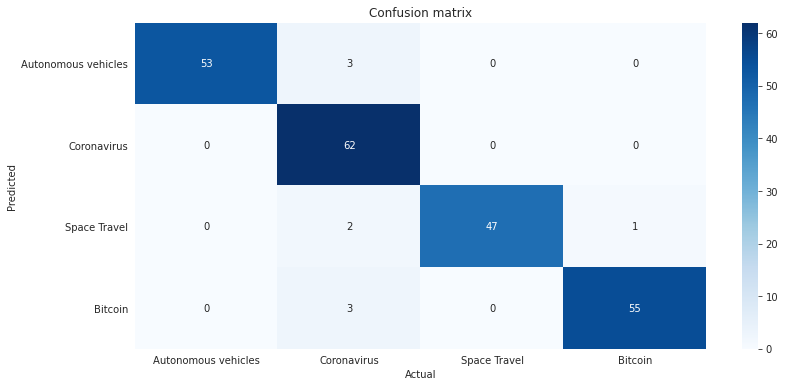

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, rfc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

At this point, we could get the average time the model takes to get predictions. We want the algorithm to be fast since we are creating an app which will gather data from the internet and get the predicted categories. However, since the difference when predicting 10-20 observations will be very little, we won't take this into account.

However, the code below could do this task:

```python
features_time = features_train
elapsed_list = []
for i in range(0,10):
    
    start = time.time()
    predictions = best_lrc.predict(features_time)
    end = time.time()
    elapsed = end - start
    elapsed_list.append(elapsed)

mean_time_elapsed = np.mean(elapsed_list)
```

Let's see if the hyperparameter tuning process has returned a better model:

In [ ]:
base_model = RandomForestClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9601769911504425

In [ ]:
best_rfc.fit(features_train, labels_train)
accuracy_score(labels_test, best_rfc.predict(features_test))

0.9601769911504425

We'll create a dataset with a model summary to compare models:

In [ ]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_rfc

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.969436,0.960177


Let's save the model and this dataset:

In [ ]:
check_directory_exists(trained_models_fn)
with open(random_forest_model_fn, 'wb') as output:
    pickle.dump(best_rfc, output)

check_directory_exists(results_fn)
with open(random_forest_results_fn, 'wb') as output:
    pickle.dump(df_models_rfc, output)

# Support Vector Machine

## Cross-Validation for Hyperparameter tuning

First, we can see what hyperparameters the model has:

In [ ]:
svc_0 =svm.SVC(random_state=8)

print('Parameters currently in use:\n')
pprint(svc_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 8,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


We'll tune the following ones:

* `C`: Penalty parameter C of the error term.
* `kernel`: Specifies the kernel type to be used in the algorithm.
* `gamma`: Kernel coefficient.
* `degree`: Degree of the polynomial kernel function.


### Randomized Search Cross Validation

We first need to define the grid:

In [ ]:
# C
C = [.0001, .001, .01]

# gamma
gamma = [.0001, .001, .01, .1, 1, 10, 100]

# degree
degree = [1, 2, 3, 4, 5]

# kernel
kernel = ['linear', 'rbf', 'poly']

# probability
probability = [True]

# Create the random grid
random_grid = {'C': C,
              'kernel': kernel,
              'gamma': gamma,
              'degree': degree,
              'probability': probability
             }

pprint(random_grid)

{'C': [0.0001, 0.001, 0.01],
 'degree': [1, 2, 3, 4, 5],
 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
 'kernel': ['linear', 'rbf', 'poly'],
 'probability': [True]}


Then, we'll perform the Random Search:

In [ ]:
# First create the base model to tune
svc = svm.SVC(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=8,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.0001, 0.001, 0.01],
                                        'degree': [1, 2, 3, 4, 5],
                                        'gamma': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  10, 100],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'probability': [True]},
                   pre_dispatch='2*n_jobs', random_s

We can see the best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

After that, we can do a more exhaustive search centered in those values:

### Grid Search Cross Validation

In [ ]:
# Create the parameter grid based on the results of random search 
C = [.0001, .001, .01, .1]
degree = [3, 4, 5]
gamma = [1, 10, 100]
probability = [True]

param_grid = [
  {'C': C, 'kernel':['linear'], 'probability':probability},
  {'C': C, 'kernel':['poly'], 'degree':degree, 'probability':probability},
  {'C': C, 'kernel':['rbf'], 'gamma':gamma, 'probability':probability}
]

# Create a base model
svc = svm.SVC(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

The best hyperparameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

Let's save the model in `best_svc`:

In [ ]:
best_svc = grid_search.best_estimator_

In [ ]:
best_svc

We now know the best SVM model. Let's fit it and see how it performs:

## Model fit and performance

Now, we can fit the model to our training data:

In [ ]:
best_svc.fit(features_train, labels_train)

And get the predictions:

In [ ]:
svc_pred = best_svc.predict(features_test)

The conditional class probabilities can be obtained by typing:

`svc_pred = best_svc.predict_proba(features_test)`

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### Training accuracy

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_svc.predict(features_train)))

#### Test accuracy

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, svc_pred))

#### Classification report

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,svc_pred))

#### Confusion matrix

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, svc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

At this point, we could get the average time the model takes to get predictions. We want the algorithm to be fast since we are creating an app which will gather data from the internet and get the predicted categories. However, since the difference when predicting 10-20 observations will be very little, we won't take this into account.

However, the code below could do this task:

```python
features_time = features_train
elapsed_list = []
for i in range(0,10):
    
    start = time.time()
    predictions = best_lrc.predict(features_time)
    end = time.time()
    elapsed = end - start
    elapsed_list.append(elapsed)

mean_time_elapsed = np.mean(elapsed_list)
```

Let's see if the hyperparameter tuning process has returned a better model:

In [ ]:
base_model = svm.SVC(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

In [ ]:
best_svc.fit(features_train, labels_train)
accuracy_score(labels_test, best_svc.predict(features_test))

We'll create a dataset with a model summary to compare models:

In [ ]:
d = {
     'Model': 'SVM',
     'Training Set Accuracy': accuracy_score(labels_train, best_svc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, svc_pred)
}

df_models_svc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_svc

Let's save the model and this dataset:

In [ ]:
check_directory_exists(trained_models_fn)
with open(svm_model_fn, 'wb') as output:
    pickle.dump(best_svc, output)
    
check_directory_exists(results_fn)
with open(svm_results_fn, 'wb') as output:
    pickle.dump(df_models_svc, output)

# K Nearest Neighbors

## Cross-Validation for Hyperparameter tuning

First, we can see what hyperparameters the model has:

In [ ]:
knnc_0 =KNeighborsClassifier()

print('Parameters currently in use:\n')
pprint(knnc_0.get_params())

We'll tune the following ones:

* `K`: Number of neighbors to use by default for queries.

In this case, since there is only one hyperparameter, we'll perform an exhaustive search directly:

### Grid Search Cross Validation

We first need to define the grid:

In [ ]:
# Create the parameter grid 
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   35.6s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

The best parameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

Since the grid had a space of 5 between each element, we'll now cover all the possible `n_neighbors` near to 6:

In [ ]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

The best parameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

Let's save the model in `best_knnc`:

In [ ]:
best_knnc = grid_search.best_estimator_

In [ ]:
best_knnc

We now know the best KNN model. Let's fit it and see how it performs:

## Model fit and performance

Now, we can fit the model to our training data:

In [ ]:
best_knnc.fit(features_train, labels_train)

And get the predictions:

In [ ]:
knnc_pred = best_knnc.predict(features_test)

The conditional class probabilities can be obtained by typing:

`knnc_pred = best_knnc.predict_proba(features_test)`

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### Training accuracy

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))

#### Test accuracy

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

#### Classification report

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))

#### Confusion matrix

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

At this point, we could get the average time the model takes to get predictions. We want the algorithm to be fast since we are creating an app which will gather data from the internet and get the predicted categories. However, since the difference when predicting 10-20 observations will be very little, we won't take this into account.

However, the code below could do this task:

```python
features_time = features_train
elapsed_list = []
for i in range(0,10):
    
    start = time.time()
    predictions = best_lrc.predict(features_time)
    end = time.time()
    elapsed = end - start
    elapsed_list.append(elapsed)

mean_time_elapsed = np.mean(elapsed_list)
```

Let's see if the hyperparameter tuning process has returned a better model:

In [ ]:
base_model = KNeighborsClassifier()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

In [ ]:
best_knnc.fit(features_train, labels_train)
accuracy_score(labels_test, best_knnc.predict(features_test))

0.911504424778761

We can see that the default model (with 5 Nearest Neighbors) performs better. However, in our Grid Search Cross Validation process we tried with that number of neighbors. The reason why we may be getting this result is because de Grid Search performs a Cross Validation scheme, while this last comparison uses all training data.

We'll create a dataset with a model summary to compare models:

In [ ]:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_models_knnc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.925549,0.911504


Let's save the model and this dataset:

In [ ]:
check_directory_exists(trained_models_fn)
with open(knn_model_fn, 'wb') as output:
    pickle.dump(best_knnc, output)

check_directory_exists(results_fn)
with open(knn_results_fn, 'wb') as output:
    pickle.dump(df_models_knnc, output)

# Multinomial Naïve Bayes

## Cross-Validation for Hyperparameter tuning

In the case of the Multinomial Naïve Bayes, we will not tune any hyperparameter.

In [ ]:
mnbc = MultinomialNB()
mnbc

Let's fit it and see how it performs:

## Model fit and performance

Now, we can fit the model to our training data:

In [ ]:
mnbc.fit(features_train, labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

And get the predictions:

In [ ]:
mnbc_pred = mnbc.predict(features_test)

The conditional class probabilities can be obtained by typing:

`mnbc_pred = mnbc.predict_proba(features_test)`

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### Training accuracy

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.950626959247649


#### Test accuracy

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.9646017699115044


#### Classification report

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        56
           1       0.92      0.98      0.95        62
           2       1.00      0.94      0.97        50
           3       0.97      0.98      0.97        58

    accuracy                           0.96       226
   macro avg       0.97      0.96      0.97       226
weighted avg       0.97      0.96      0.96       226



#### Confusion matrix

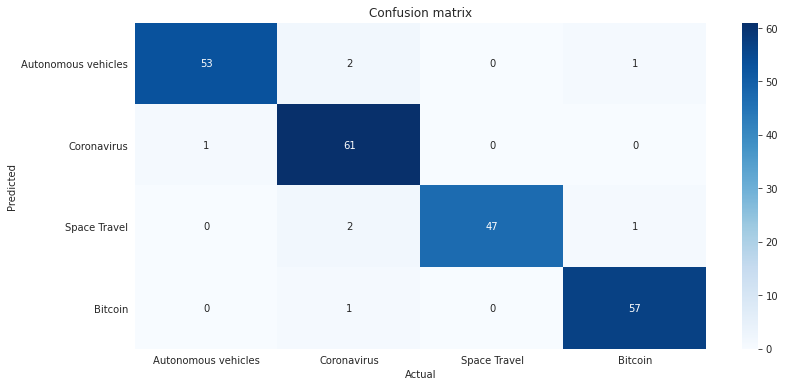

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

At this point, we could get the average time the model takes to get predictions. We want the algorithm to be fast since we are creating an app which will gather data from the internet and get the predicted categories. However, since the difference when predicting 10-20 observations will be very little, we won't take this into account.

However, the code below could do this task:

```python
features_time = features_train
elapsed_list = []
for i in range(0,10):
    
    start = time.time()
    predictions = best_lrc.predict(features_time)
    end = time.time()
    elapsed = end - start
    elapsed_list.append(elapsed)

mean_time_elapsed = np.mean(elapsed_list)
```

We'll create a dataset with a model summary to compare models:

In [ ]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.950627,0.964602


Let's save the model and this dataset:

In [ ]:
check_directory_exists(trained_models_fn)
with open(multinomial_naive_bayes_model_fn, 'wb') as output:
    pickle.dump(mnbc, output)

check_directory_exists(results_fn)  
with open(multinomial_naive_bayes_results_fn, 'wb') as output:
    pickle.dump(df_models_mnbc, output)

# Multinomial Logistic Regression

## Cross-Validation for Hyperparameter tuning

First, we can see what hyperparameters the model has:

In [ ]:
lr_0 = LogisticRegression(random_state = 8)

print('Parameters currently in use:\n')
pprint(lr_0.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

* `C` = Inverse of regularization strength. Smaller values specify stronger regularization.
* `multi_class` = We'll choose `multinomial` because this is a multi-class problem.
* `solver` = Algorithm to use in the optimization problem. For multiclass problems, only `newton-cg`, `sag`, `saga` and `lbfgs` handle multinomial loss.
* `class_weight`: Weights associated with classes. 
* `penalty`: Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.

### Randomized Search Cross Validation

We first need to define the grid:

In [ ]:
# C
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]

# multi_class
multi_class = ['multinomial']

# solver
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
 
# class_weight
class_weight = ['balanced', None]

# penalty
penalty = ['l2']

# Create the random grid
random_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_grid)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


Then, we'll perform the Random Search:

In [ ]:
# First create the base model to tune
lrc = LogisticRegression(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=lrc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   11.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=8,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'class_weight': ['balanc

We can see the best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

After that, we can do a more exhaustive search centered in those values:

### Grid Search Cross Validation

In [ ]:
# Create the parameter grid based on the results of random search 
C = [float(x) for x in np.linspace(start = 0.6, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['sag']
class_weight = ['balanced']
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

# Create a base model
lrc = LogisticRegression(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lrc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

The best hyperparameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

Let's save the model in `best_lrc`:

In [ ]:
best_lrc = grid_search.best_estimator_

In [ ]:
best_lrc

LogisticRegression(C=0.6888888888888889, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=8, solver='sag', tol=0.0001,
                   verbose=0, warm_start=False)

We now know the best logistic regression model. Let's fit it and see how it performs:

## Model fit and performance

Now, we can fit the model to our training data:

In [ ]:
best_lrc.fit(features_train, labels_train)

And get the predictions:

In [ ]:
lrc_pred = best_lrc.predict(features_test)

The conditional class probabilities can be obtained by typing:

`lrc_pred = best_lrc.predict_proba(features_test)`

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### Training accuracy

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_lrc.predict(features_train)))

The training accuracy is: 
0.9639498432601881


#### Test accuracy

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, lrc_pred))

The test accuracy is: 
0.9601769911504425


#### Classification report

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,lrc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        56
           1       0.98      0.95      0.97        62
           2       1.00      0.94      0.97        50
           3       0.98      0.97      0.97        58

    accuracy                           0.96       226
   macro avg       0.96      0.96      0.96       226
weighted avg       0.96      0.96      0.96       226



#### Confusion matrix

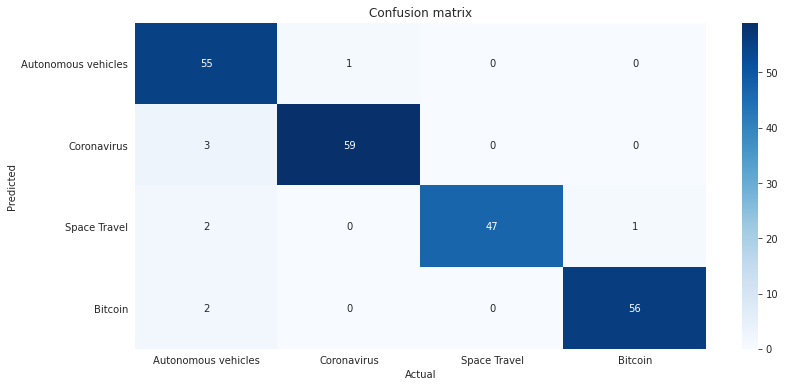

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, lrc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

At this point, we could get the average time the model takes to get predictions. We want the algorithm to be fast since we are creating an app which will gather data from the internet and get the predicted categories. However, since the difference when predicting 10-20 observations will be very little, we won't take this into account.

However, the code below could do this task:

```python
features_time = features_train
elapsed_list = []
for i in range(0,10):
    
    start = time.time()
    predictions = best_lrc.predict(features_time)
    end = time.time()
    elapsed = end - start
    elapsed_list.append(elapsed)

mean_time_elapsed = np.mean(elapsed_list)
```

Let's see if the hyperparameter tuning process has returned a better model:

In [ ]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9601769911504425

In [ ]:
best_lrc.fit(features_train, labels_train)
accuracy_score(labels_test, best_lrc.predict(features_test))

0.9601769911504425

We get approximately the same accuracy.

We'll create a dataset with a model summary to compare models:

In [ ]:
d = {
     'Model': 'Logistic Regression',
     'Training Set Accuracy': accuracy_score(labels_train, best_lrc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, lrc_pred)
}

df_models_lrc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_lrc

,Model,Training Set Accuracy,Test Set Accuracy
0,Logistic Regression,0.96395,0.960177


Let's save the model and this dataset:

In [ ]:
check_directory_exists(trained_models_fn)
with open(multinomial_logistic_regression_model_fn, 'wb') as output:
    pickle.dump(best_lrc, output)

check_directory_exists(results_fn)  
with open(multinomial_logistic_regression_results_fn, 'wb') as output:
    pickle.dump(df_models_lrc, output)

# Gradient Boosting Machine

References: 

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

## Cross-Validation for Hyperparameter tuning

First, we can see what hyperparameters the model has:

In [ ]:
gb_0 = GradientBoostingClassifier(random_state = 8)

print('Parameters currently in use:\n')
pprint(gb_0.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 8,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


We'll tune the following ones:

Tree-related hyperparameters:
* `n_estimators` = number of trees in the forest.
* `max_features` = max number of features considered for splitting a node
* `max_depth` = max number of levels in each decision tree
* `min_samples_split` = min number of data points placed in a node before the node is split
* `min_samples_leaf` = min number of data points allowed in a leaf node

Boosting-related hyperparameters:
* `learning_rate`= learning rate shrinks the contribution of each tree by learning_rate.
* `subsample`= the fraction of samples to be used for fitting the individual base learners.

### Randomized Search Cross Validation

We first need to define the grid. Since we have a huge amount of hyperparameters, we'll try few values for each one.

In [ ]:
# n_estimators
n_estimators = [200, 800]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [10, 40]
max_depth.append(None)

# min_samples_split
min_samples_split = [10, 30, 50]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# learning rate
learning_rate = [.1, .5]

# subsample
subsample = [.5, 1.]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate,
               'subsample': subsample}

pprint(random_grid)

{'learning_rate': [0.1, 0.5],
 'max_depth': [10, 40, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [10, 30, 50],
 'n_estimators': [200, 800],
 'subsample': [0.5, 1.0]}


Then, we'll perform the Random Search:

In [ ]:
# First create the base model to tune
gbc = GradientBoostingClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=gbc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 20.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

We can see the best hyperparameters resulting from the Random Search:

In [ ]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

After that, we can do a more exhaustive search centered in those values:

### Grid Search Cross Validation

In [ ]:
# Create the parameter grid based on the results of random search 
max_depth = [5, 10, 15]
max_features = ['sqrt']
min_samples_leaf = [2]
min_samples_split = [50, 100]
n_estimators = [800]
learning_rate = [.1, .5]
subsample = [1.]

param_grid = {
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'subsample': subsample

}

# Create a base model
gbc = GradientBoostingClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=gbc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

The best hyperparameters turn out to be:

In [ ]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

Let's save the model in `best_gbc`:

In [ ]:
best_gbc = grid_search.best_estimator_

In [ ]:
best_gbc

We now know the best gradient boosting model. Let's fit it and see how it performs:

## Model fit and performance

Now, we can fit the model to our training data:

In [ ]:
best_gbc.fit(features_train, labels_train)

And get the predictions:

In [ ]:
gbc_pred = best_gbc.predict(features_test)

The conditional class probabilities can be obtained by typing:

`gbc_pred = best_gbc.predict_proba(features_test)`

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### Training accuracy

In [ ]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_gbc.predict(features_train)))

#### Test accuracy

In [ ]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, gbc_pred))

#### Classification report

In [ ]:
# Classification report
print("Classification report")
print(classification_report(labels_test,gbc_pred))

#### Confusion matrix

In [ ]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, gbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

At this point, we could get the average time the model takes to get predictions. We want the algorithm to be fast since we are creating an app which will gather data from the internet and get the predicted categories. However, since the difference when predicting 10-20 observations will be very little, we won't take this into account.

However, the code below could do this task:

```python
features_time = features_train
elapsed_list = []
for i in range(0,10):
    
    start = time.time()
    predictions = best_lrc.predict(features_time)
    end = time.time()
    elapsed = end - start
    elapsed_list.append(elapsed)

mean_time_elapsed = np.mean(elapsed_list)
```

Let's see if the hyperparameter tuning process has returned a better model:

In [ ]:
base_model = GradientBoostingClassifier(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

In [ ]:
best_gbc.fit(features_train, labels_train)
accuracy_score(labels_test, best_gbc.predict(features_test))

We'll create a dataset with a model summary to compare models:

In [ ]:
d = {
     'Model': 'Gradient Boosting',
     'Training Set Accuracy': accuracy_score(labels_train, best_gbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, gbc_pred)
}

df_models_gbc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_gbc

Let's save the model and this dataset:

In [ ]:
check_directory_exists(trained_models_fn)
with open(gradient_boosting_machine_model_fn, 'wb') as output:
    pickle.dump(best_gbc, output)

check_directory_exists(results_fn)   
with open(gradient_boosting_machine_results_fn, 'wb') as output:
    pickle.dump(df_models_gbc, output)

# Best Model Selection

Now that we have trained all the models, let's select the one we'll use for the application. We'll need to get the performance metrics generated in every model:

In [ ]:
result_filename_list = [
    random_forest_results_fn,
    svm_results_fn,
    knn_results_fn,
    multinomial_naive_bayes_results_fn,
    multinomial_logistic_regression_results_fn,
    gradient_boosting_machine_results_fn
]

df_summary = pd.DataFrame()

for results_filename in result_filename_list:
    with open(results_filename, 'rb') as data:
        df = pickle.load(data)
    df_summary = df_summary.append(df)

df_summary = df_summary.reset_index().drop('index', axis=1)

Let's see the summary:

In [ ]:
df_summary

,Model,Training Set Accuracy,Test Set Accuracy
0,Random Forest,0.969436,0.960177
1,SVM,0.949843,0.964602
2,KNN,0.925549,0.911504
3,Multinomial Naïve Bayes,0.950627,0.964602
4,Logistic Regression,0.963950,0.960177
5,Gradient Boosting,0.973354,0.955752


And sort it by **Test Set Accuracy**:

In [ ]:
df_summary.sort_values('Test Set Accuracy', ascending=False)

,Model,Training Set Accuracy,Test Set Accuracy
1,SVM,0.949843,0.964602
3,Multinomial Naïve Bayes,0.950627,0.964602
0,Random Forest,0.969436,0.960177
4,Logistic Regression,0.963950,0.960177
5,Gradient Boosting,0.973354,0.955752
2,KNN,0.925549,0.911504


The Gradient Boosting, Logistic Regression and Random Forest seem to be overfit, so we'll discard them. From the remaining models, we will choose the **Support Vector Machine** since it has the highest Test Set Accuracy.

# Dimensionality Reduction Plots

We'll perform a dimensionality reduction technique to plot the observations in 2 dimensions.

We'll use two techniques:

* **Principal Component Analysis**: this technique relies on the obtention of the eigenvalues and eigenvectors of the data matrix and tries to provide a minimum number of variables that keep the maximum amount of variance.
* **t-SNE**: the t-distributed Stochastic Neighbour Embedding is a probabilistic technique particularly well suited for the visualization of high-dimensional datasets. It minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.





We'll unify training and test sets. The initial shapes are:

In [ ]:
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(1276, 167)
(226, 167)
(1276,)
(226,)


Let's do the concatenation:

In [ ]:
features = np.concatenate((features_train,features_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)

And check the shapes are correct:

In [ ]:
print(features.shape)
print(labels.shape)

(1502, 167)
(1502,)


We'll define a function that comprises the whole visualization process:

In [ ]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'Autonomous vehicles',
        "1": 'Coronavirus',
        "2": 'Space Travel',
        "3": 'Bitcoin'
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "pink", "royalblue", "greenyellow"],
                    alpha=.7).set_title(title);

## Dimensionality reduction with PCA

Let's plot the PCA model result:

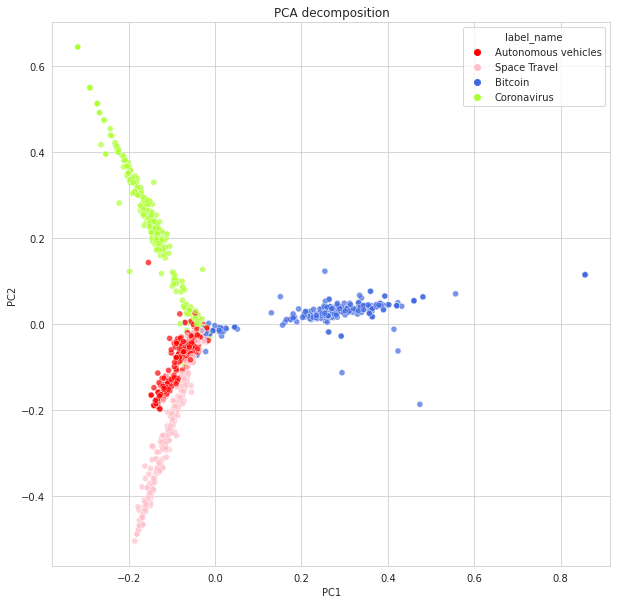

In [ ]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)

## Dimensionality Reduction with t-SNE

Let's plot the t-SNE model result:

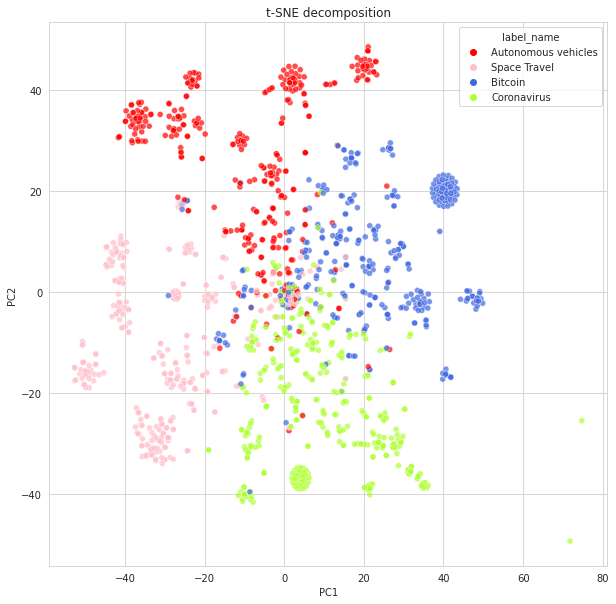

In [ ]:
plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)

We can see that the t-SNE decomposition works much better on our data.

# Model Interpretation

At this point we have selected the SVM as our preferred model to do the predictions. We will now study its behaviour by analyzing misclassified articles. Hopefully this will give us some insights on the way the model is working.

Let's load what we need:

In [ ]:
# Dataframe
with open(df_fn, 'rb') as data:
    df = pickle.load(data)

# X_train
with open(X_train_fn, 'rb') as data:
    X_train = pickle.load(data)

# X_test
with open(X_test_fn, 'rb') as data:
    X_test = pickle.load(data)

# y_train
with open(y_train_fn, 'rb') as data:
    y_train = pickle.load(data)

# y_test
with open(y_test_fn, 'rb') as data:
    y_test = pickle.load(data)

# features_train
with open(features_train_fn, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
with open(labels_train_fn, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
with open(features_test_fn, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
with open(labels_test_fn, 'rb') as data:
    labels_test = pickle.load(data)
    
# SVM Model
with open(svm_model_fn, 'rb') as data:
    svc_model = pickle.load(data)
    
# Category mapping dictionary
category_codes = {
    'Autonomous vehicles': 0,
    'Coronavirus': 1,
    'Space Travel': 2,
    'Bitcoin': 3
}

category_names = {
    0: 'Autonomous vehicles',
    1: 'Coronavirus',
    2: 'Space Travel',
    3: 'Bitcoin'
}

Let's get the predictions on the test set:

In [ ]:
predictions = svc_model.predict(features_test)

Now we'll create the Test Set dataframe with the actual and predicted categories:

In [ ]:
# Indexes of the test set
index_X_test = X_test.index

# We get them from the original df
df_test = df.loc[index_X_test]

# Add the predictions
df_test['Prediction'] = predictions

# Clean columns
df_test = df_test[['Content_Parsed_6', 'Category', 'Category_Code', 'Prediction']]

# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})

# Clean columns again
df_test = df_test[['Content_Parsed_6', 'Category', 'Category_Predicted']]

In [ ]:
df_test.head()

,Content_Parsed_6,Category,Category_Predicted
719,coronavirus (covid-19) taxis phvs,Coronavirus,Coronavirus
437,facebook say post cast doubt covid-19 vaccin...,Coronavirus,Coronavirus
51,global hd map autonomous vehicles market repo...,Autonomous vehicles,Autonomous vehicles
525,3 broward county florida educators die covid,Coronavirus,Coronavirus
238,self-driving cars could decades away matter,Autonomous vehicles,Autonomous vehicles


Let's get the misclassified articles:

In [ ]:
condition = (df_test['Category'] != df_test['Category_Predicted'])

df_misclassified = df_test[condition]

df_misclassified.head(3)

,Content_Parsed_6,Category,Category_Predicted
859,lauren sanchez plan party celebrate billionair...,Space Travel,Bitcoin
943,buttigieg cheer spaceflight say ' go ' heartb...,Space Travel,Coronavirus
22,ford chair bill ford vision greener auto ind...,Autonomous vehicles,Coronavirus


Let's get a sample of 3 articles. We'll define a function to make this process faster:

In [ ]:
def output_article(row_article):
    print('Actual Category: %s' %(row_article['Category']))
    print('Predicted Category: %s' %(row_article['Category_Predicted']))
    print('-------------------------------------------')
    print('Text: ')
    print('%s' %(row_article['Content_Parsed_6']))

We'll get three random numbers from the indexes:

In [ ]:
list_samples = random.sample(list(df_misclassified.index), 3)
list_samples

[943, 1014, 81]

First case:

In [ ]:
output_article(df_misclassified.loc[list_samples[0]])

Actual Category: Space Travel
Predicted Category: Coronavirus
-------------------------------------------
Text: 
buttigieg cheer spaceflight say ' go '  heartbeat'


Second case:

In [ ]:
output_article(df_misclassified.loc[list_samples[1]])

Actual Category: Space Travel
Predicted Category: Coronavirus
-------------------------------------------
Text: 
'  smart family decision' mila kunis convince ashton 


Third case:

In [ ]:
output_article(df_misclassified.loc[list_samples[2]])

Actual Category: Autonomous vehicles
Predicted Category: Coronavirus
-------------------------------------------
Text: 
automotive infrared night vision system research report 2021


We can see that in all cases the category is not 100% clear, since these articles contain concepts of both categories. These errors will always happen and we are not looking forward to be 100% accurate on them.

# Sample Articles

We'll get some articles and predict their category to see how the model works on newly scraped data. These will allow further comprehension of the model and we will be able to determine a threshold to assign a given article to the category `other`.


We have to import:

* TF-IDF model

#### TF-IDF object

In [ ]:
with open(tfidf_fn, 'rb') as data:
    tfidf = pickle.load(data)

#### Feature engineering workflow

In [ ]:
punctuation_signs = list("?:!.,;")
stop_words = list(stopwords.words('english'))

def create_features_from_text(text):
    
    # Dataframe creation
    lemmatized_text_list = []
    df = pd.DataFrame(columns=['Content'])
    df.loc[0] = text
    df['Content_Parsed_1'] = df['Content'].str.replace("\r", " ")
    df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("\n", " ")
    df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace("    ", " ")
    df['Content_Parsed_1'] = df['Content_Parsed_1'].str.replace('"', '')
    df['Content_Parsed_2'] = df['Content_Parsed_1'].str.lower()
    df['Content_Parsed_3'] = df['Content_Parsed_2']
    for punct_sign in punctuation_signs:
        df['Content_Parsed_3'] = df['Content_Parsed_3'].str.replace(punct_sign, '')
    df['Content_Parsed_4'] = df['Content_Parsed_3'].str.replace("'s", "")
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_list = []
    text = df.loc[0]['Content_Parsed_4']
    text_words = text.split(" ")
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    lemmatized_text = " ".join(lemmatized_list)    
    lemmatized_text_list.append(lemmatized_text)
    df['Content_Parsed_5'] = lemmatized_text_list
    df['Content_Parsed_6'] = df['Content_Parsed_5']
    for stop_word in stop_words:
        regex_stopword = r"\b" + stop_word + r"\b"
        df['Content_Parsed_6'] = df['Content_Parsed_6'].str.replace(regex_stopword, '')
    df = df['Content_Parsed_6']
    
    # TF-IDF
    features = tfidf.transform(df).toarray()
    
    return features

Now let's write a function that tells us the category given the category code:

In [ ]:
def get_category_name(category_id):
    for category, id_ in category_codes.items():    
        if id_ == category_id:
            return category

Finally, let's write a function that includes the whole process:

In [ ]:
def predict_from_text(text):
    
    # Predict using the input model
    prediction_svc = svc_model.predict(create_features_from_text(text))[0]
    prediction_svc_proba = svc_model.predict_proba(create_features_from_text(text))[0]
    
    # Return result
    category_svc = get_category_name(prediction_svc)
    
    print("The predicted category using the SVM model is %s." %(category_svc) )
    print("The conditional probability is: %a" %(prediction_svc_proba.max()*100))

### Text introduction and prediction

Please introduce `text`:

In [ ]:
text = """

On the surface, the concept of a self-driving car seems deceptively simple. But after a decade of splashy announcements and enormous investments from Silicon Valley’s most influential organizations, few people understand the dichotomy between the idea and its execution better than Mohamed Elshenawy. As senior vice president of engineering teams at autonomous vehicle company Cruise, he spends his working life neck-deep in the challenges that come from building a self-driving car.  

“One of the common questions I get asked by friends and family is, ‘Why does it take so long to solve the self-driving problem?’” 

The answer? 

“We aren’t teaching a human brain, which has already evolved over hundreds of thousands of years to accurately perceive the world and predict actions within their surroundings. We are essentially building an AV brain that can do all that without stagnating or making silly mistakes or getting tired, bored or distracted. In order to do that, we’re compressing hundreds of thousands of years of human intelligence into just a few years.”

While some self-driving contenders have opted to test their technology on quieter roads in the hopes of solving “easier” driving conditions before venturing into complex urban driving, Cruise has jumped straight into the deep end — in this case, the hilly streets of its hometown. The theory goes that once you’ve solved city driving — with its construction sites, pedestrians, cyclists and haphazard traffic — it will be easier to scale out and expand the service elsewhere. 

To support its engineering work, Cruise has organized its teams around the concept of psychological safety.

“We have to be willing to embrace risks within our safety bounds, different perspectives and new ways of doing things,” Elshenawy explained. “This experimentation mindset is part of a new paradigm shift we’re seeing toward ML-native companies, ones that are not just optimized by ML but defined by it.”

To learn more about the organizational architecture that provides space for innovation within its strict safety standards, Built In asked Elshenawy to explain what psychological safety means in practice.

"""

In [ ]:
predict_from_text(text)

The predicted category using the SVM model is Autonomous vehicles.
The conditional probability is: 99.92732762131023


## Threshold determination

We'll introduce some news articles text and see how the conditional probability vector behaves. Firstly we'll introduce articles that clearly belong to one of the five categories and then, we'll introduce articles that do not belong to neither of them.

### Articles that clearly belong to one of the five categories

In [ ]:
# Coronavirus

text = """
The district has 204 active cases — 181 of those are students.

Lockhart ISD, located in Caldwell County, has already closed four classes and a 
student program because 20% or more students were diagnosed with coronavirus. 
More closures are expected and everyone, including students, will now have to 
wear masks during in-person classes.

The Texas Tribune reports at least 45 small school districts across Texas have been forced 
to temporarily stop in-person classes because of COVID-19 spread.

At Leander Independent School District in Williamson County, two middle schools were 
shut down for two weeks after over 400 cases were confirmed in the school community. 
Since the beginning of classes, Leander ISD has logged over 840 positive cases.

Nevertheless, Governor Greg Abbott’s ban on mask mandates in public schools remains 
firmly in place. Meanwhile, Texas Attorney General Ken Paxton threatened legal action 
against districts who do impose their own mandates.

Recent polling from the University of Texas Austin’s Texas Politics Project found 56% 
of Texans support requiring public school students and staff to mask up on campuses. 
Forty-seven percent polled strongly support it.
"""

predict_from_text(text)

The predicted category using the SVM model is Coronavirus.
The conditional probability is: 99.26920734062435


In [ ]:
# Autonomous Vehicles

text = """
Autonomous tech is becoming more and more common on new vehicles with each passing model year. Whilst at one point adaptive cruise control may have been considered an excessive option, many new car buyers now view it as essential. Features such as lane keep / change assist were considered revolutionary when they first appeared on the Tesla Model S in late 2014, but are now commonplace. With all these rapid developments in self-driving tech a lot of people believe it is only a matter of time before all cars on the road are driving and communicating solely by themselves, and research firm IDTechEx agrees.

In a new report dubbed “Autonomous Cars, Robotaxis & Sensors 2022-2042” IDTechEx delves deep into the future of automated mobility. The company states self-driving vehicles are not distracted by things which may influence humans, such as fellow drivers or mobile phones. The firm also reckons 5G connectivity will ensure self-driving vehicles receive more real-time information about their surroundings than a human could ever process.

IDTechEx believes with current developments we could see autonomous vehicles matching or exceeding human safety levels by as soon as 2024. If growth is sustained, the report suggests by 2046 self-driving vehicles could meet the total mobility demand of the US – 3 trillion miles per annum. Then by 2050 autonomous vehicles could theoretically meet the entire transport needs of the world, with less than one accident per year. At this point, IDTechEx expects in many countries human driving on public roads will be outlawed in order to prevent injury, accidents and interference with self-driving vehicles that are all communicating amongst themselves.

The main problem IDTechEx forecasts however is not the continued development and improvement of autonomous tech, but regulation. Regulators could be potential barriers to progress, with IDTechEx identifying Tesla’s loss of its top safety rating from the NHTSA for the Model 3 and Y as a key example.  Tesla removed radar from both vehicles in May in an effort to improve their autonomous systems with less interference, however the NHTSA believed both cars were safer with it – going against Tesla’s expertise, data and research.

Regardless, the coming years will certainly be interesting. The auto industry as a whole is reaching a new electric and autonomous era, and rapidly leaving the ways of the past behind. What will come of classic and enthusiast cars and their drivers in this forthcoming period? Perhaps certain “unregulated” routes may exist far from cities and civilization, or else they could just be restricted to driving on race tracks – but that’s all just speculation on my own behalf.
"""

predict_from_text(text)

The predicted category using the SVM model is Autonomous vehicles.
The conditional probability is: 99.99114809850987


In [ ]:
# Space Travel

text = """
Axios' "How it Happened: The Next Astronauts" podcast follows the first all-civilian space crew as they prepare for their historic mission. 

The launch next month of the first all-civilian mission to orbit is an ambitious test for a burgeoning space industry's futuristic dream of sending many more ordinary people to space in the next few years.

Why it matters: Companies and nations envision millions of people living and working in space without having to become professional, government-backed astronauts. Those hopes are riding on SpaceX's next crewed mission, called Inspiration4.

Previous launches have taken billionaires to suborbital space or sent space tourists to the International Space Station alongside professional astronauts, but this mission is the first with a crew made up entirely of amateur astronauts.
What's happening: Inspiration4 is effectively a proof of concept for the idea that an all-civilian mission aboard SpaceX's Crew Dragon spacecraft — and ostensibly that all-amateur spaceflight — can work.

Four crewmembers — Jared Isaacman, Sian Proctor, Chris Sembroski and Hayley Arceneaux — will launch atop a Falcon 9 rocket from Cape Canaveral, Florida, on Sept. 15.
They will orbit the Earth for about three days, flying higher than the International Space Station and Hubble Space Telescope before coming in for a splashdown off the Florida coast.
During their mission, the crew will live in close quarters, stare down at Earth and at the stars, perform science experiments and keep an eye on how their spacecraft is performing while mission controllers monitor it from the ground.
The big picture: SpaceX wants space travel one day to be akin to air travel so that anyone who wants to can fly to orbit or far-off parts of space.

"We'd like to see aircraft like — airline, like — operations from a human spaceflight perspective, and so this chance to have our first commercial all-civilian flight is awesome," SpaceX director of human spaceflight Benji Reed told me.
Yes, but: Flying to space isn't anything like flying on a commercial airliner, at least not yet.

It's taken this crew months of training in locations around the U.S. to get ready for their launch, and it has dominated their lives since the full crew was announced in March.
The four crewmembers have effectively gotten a crash course in astronaut training, spending time in simulators, studying reams of notes on their own time and taking quizzes from SpaceX.
While they may not be professionals, they will certainly not be like a typical airline passenger when they fly to space in September. Their training has effectively been a test of how much pre-flight instruction ordinary people will need to fly to orbit and how quickly that process can go.
How it works: Inspiration4's crew was chosen through means more akin to something on reality TV than professional astronaut selection.

Isaacman wanted the mission to be all-civilian from the start and he didn't want to just take a few of his friends along for the ride.
Instead, he decided to add a fundraising component — raising $100 million for St. Jude Children's Research Hospital on top of Isaacman's $100 million donation — and open up seats to complete strangers.
Sembroski was chosen via a sweepstakes that anyone could enter. Proctor won her seat through a contest for entrepreneurs. Arceneaux — a childhood cancer survivor treated by St. Jude who is now a physician assistant at the hospital — was picked by the charity to represent it in space.
The bottom line: Inspiration4 is a coming-of-age moment for an adolescent commercial spaceflight industry trying to fly many more people to space in the future.
"""

predict_from_text(text)

The predicted category using the SVM model is Space Travel.
The conditional probability is: 97.54944071833633


In [ ]:
# Bitcoin

text = """

Bitcoin (BTC) is struggling to sustain above $50,500 but that has not stopped the altcoins from following 
in Ether's (ETH) footsteps after the top-ranked altcoin hit $4,000 on Sept. 3. 
This has pushed Ether’s market dominance above 20% while Bitcoin’s dominance has shrunk to 41.1%.

However, Bitcoin’s hesitation in the past few days has not altered the outlook of Bloomberg senior
commodity strategist Mike McGlone who has retained a $100,000 target on Bitcoin and $5,000 on Ether.

"""

predict_from_text(text)

The predicted category using the SVM model is Bitcoin.
The conditional probability is: 99.99999784748826


We can see that in almost every case the highest conditional probability is higher than **95%**.

### Articles that don't belong to neither of the five categories

In [ ]:
# Weather

text = """
A polar air mass that entered the Iberian peninsula on Wednesday has already caused sharp drops in temperature, but the worst is yet to come, said the national weather service Aemet.

“An episode of intense cold” is forecast for Friday, when the mercury will continue to plummet across much of Spain. Thirty provinces are on yellow alert, the lowest on a three-color scale, except for Guadalajara, where there is an orange advisory in place. Lows of -10 ºC are expected in Parameras de Molina.

Elsewhere, weather stations have recorded -8.2ºC in La Molina (Girona), at an elevation of 1,700 meters, and -6.8ºC in Puerto de Navacerrada (Madrid).

 Almería has rolled out vehicles to deal with wintry road conditions.
Almería has rolled out vehicles to deal with wintry road conditions. DIPUTACIÓN DE ALMERÍA EUROPA PRESS
Aemet spokesman Rubén del Campo said that the cold spell is not out of the ordinary for a month of January, and noted that “we are emerging from a warm December when temperatures were 1.2ºC above average.”

Temperatures have already dipped between six and eight degrees in a matter of hours in some parts of Spain, said Del Campo. And the northerly wind will increase the feeling of cold.

Temperatures on Friday and Saturday will be “very cold, with lows of five to 10 degrees below average in many parts of northern and eastern Spain, and in the Balearics,” he added.

No snow
However, little to no snow is expected “not for lack of cold, but for lack of precipitation, since the air mass is very dry.”

Alerts are in place in Almería, Granada, Jaén, Aragón, Cantabria, Castilla-La Mancha, Castilla y León except for Salamanca and Valladolid, Catalonia save for Tarragona, Madrid, Navarre, the Valencia region, the Balearic Islands, La Rioja, Asturias and Murcia.

On Saturday, the orange warnings will extend to Córdoba, Salamanca, Valladolid, Galicia and Lleida, where lows of -10 ºC are expected in the Vall d’Aran.


"""

predict_from_text(text)

The predicted category using the SVM model is Autonomous vehicles.
The conditional probability is: 81.91436633427779


In [ ]:
# Health

text = """
The obesity epidemic has been on the rise for years, with cases nearly tripling since 1975, according to the World Health Organization (WHO). And the outlook for the future is equally bleak – and that includes Spain, a country that is famed for the positive effects of its supposedly Mediterranean diet.

An investigation by the Mar de Barcelona hospital has found that 80% of men and 55% of women will be overweight by 2030. If the current trend continues, the researchers write, within 11 years more than 27 million people in Spain will be overweight.

Being overweight can mean a higher risk of suffering a number of diseases, including diabetes, hypertension, stroke and cancer

The study, published in the Spanish Cardiology Magazine, points out that this epidemic will mean costs of €3 billion for the country’s health system.

The issue, the experts state, is not an esthetic one, but rather a question of health. Being overweight can mean a higher risk of suffering a number of diseases, including diabetes, hypertension, stroke, cancer and other cardiovascular conditions.

Researchers at the Barcelona hospital revised all of the scientific literature published in Spain on epidemiology and the prevalence of obesity and excess weight between 1987 and 2014 in order to come up with an accurate picture of the state of the country’s residents. “We found the trends and we cross-referenced them with data covering the general population from the National Statistics Institute in order to estimate the figures of obesity and excess weight,” explains Álvaro Hernáez, the chief researcher on the project. The results revealed an “alarming future.”

There are currently 25 million people with excess weight, three million more than a decade ago

DR ALBERT GODAY, AUTHOR OF THE STUDY

“There are currently 25 million people with excess weight, three million more than a decade ago,” explains Dr Albert Goday, another author of the study. “In a conservative scenario, if this trend continues, there will be another three million more – 16% more cases – by 2030.”

“In men, excess weight is more usual up to the age of 50,” explains Goday. “From 50 onward, obesity rises among women. These are issues that are intrinsically linked to hormonal metabolism. From a certain age, it is harder for women to control their weight.”

The experts argue that any weight loss, no matter how small, reduces the risk of contracting one of the associated illnesses. “We aren’t going to find the key to this or a vaccination overnight,” Goday adds. “But any minor intervention will help to reduce the risk. You might think that you have made a huge effort and have only lost four kilos when you need to lose many more, but you must bear in mind that those four kilos are already reducing the risk.”

"""

predict_from_text(text)

The predicted category using the SVM model is Coronavirus.
The conditional probability is: 89.98738387356995


In [ ]:
# Animal abuse

text = """
Spain’s animal rights party PACMA posted a 38-second video on Twitter on Friday showing a man freeing a fox from a cage, before hunters immediately start shooting at it.

“Hunters shut what appears to be a fox in a cage and let it out only to pepper it with bullets,” says the accompanying text. “Another ‘isolated case’ as the hunting lobby refers to it. Every week, a trickle of ‘isolated cases.’ In fact, they are dangerous psychopaths with a rifle and a license to carry arms.”

 Video insertado

PACMA
✔
@PartidoPACMA
 Cazadores enjaulan a lo que parece ser un zorro y lo liberan solo para acribillarlo a tiros. Otro "caso aislado", de los que habla el lobby de la caza. Cada semana varios "casos aislados".

En realidad, son peligrosos psicópatas con escopeta y permiso de amas. #YoNoDisparo

4.188
10:43 - 4 ene. 2019
7.443 personas están hablando de esto
Información y privacidad de Twitter Ads
At the start of the video, a man teases the caged animal with a stick. When the cage door is opened, the animal makes a run for it, but is shot at by men armed with rifles who are waiting by the cage.

The release of the video, which has had 255,000 views, coincided with the launch of PACMA’s campaign against the start of fox-hunting season in Galicia. “Fox-hunting season in Galicia has started: hunts that hide behind environmental excuses, championships in which the only reason to compete is to kill. The hunters will be entitled to pursue and kill thousands of foxes in the countryside,” states PACMA.

As it notes on its website, PACMA is the only political group that opposes hunting, and it is currently demanding a nationwide ban. “No animal should die under fire,” say the group. “We will fight tirelessly until hunting becomes a crime.”

No animal should die under fire. We will fight tirelessly until hunting becomes a crime

PACMA

The animal rights group is preparing a report to send to the regional government of Galicia against fox hunts. “We are working hard to make it the first Spanish region to assign resources to protecting foxes instead of killing them,” says a source at PACMA.

Last month, a Spanish hunter who was filmed while he chased and tortured a fox was identified by the Civil Guard in the Spanish province of Huesca. The man, aged 35, is facing charges of crimes against wildlife.

And in November, animal rights groups and political parties reacted with indignation over a viral video shot in Cáceres province of 12 hunting dogs falling off a cliff edge, followed by the deer they were attacking.

"""

predict_from_text(text)

The predicted category using the SVM model is Coronavirus.
The conditional probability is: 42.58676302094424


In these cases, the highest probability is much lower, ranging from 40% to 63%.

### Threshold

Taking this into account, we will fix the threshold at **85%**. This means that if the class with the highest probability has its probability lower than 85%, the article will be tagged as **Other**.